# 1. Dataset Preparation

dataset1 is rendered by the blender is in 512*512 images, and the joint coordinates are in 16,2 shape.
dataset2 is some realworld image, with labeled by mediapipe, label shaping in 21,2

because dataset 1 only have 16 joint data, and mediapipe will generate 21 joints, so I have to make a match.

In [1]:
import os.path
import sys

import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from scripts.feature_extraction.mediapiple import get_mediapipe_preds

dataset1_path = '../../auto_generator/ply2obj2img'
dataset2_path = '../../../data/data/dataset2'

use mediapipe to predict a dataset2 image

[[210, 281], [222, 286], [235, 283], [240, 274], [244, 266], [252, 272], [268, 273], [276, 272], [282, 271], [247, 260], [258, 252], [260, 249], [261, 248], [237, 252], [243, 243], [243, 240], [244, 240], [226, 249], [224, 242], [223, 238], [222, 238]]
[[208. 288.]
 [265. 274.]
 [278. 275.]
 [282. 277.]
 [251. 262.]
 [256. 257.]
 [261. 251.]
 [218. 241.]
 [215. 239.]
 [214. 235.]
 [232. 250.]
 [236. 250.]
 [241. 240.]
 [244. 287.]
 [263. 302.]
 [283. 304.]]


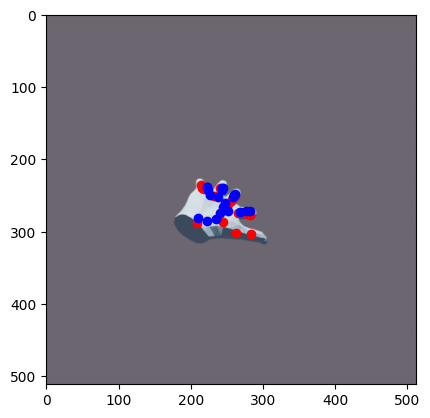

In [4]:
test_image = '01_01r.png'
p = os.path.abspath(os.path.join(dataset1_path, test_image))
mediapipe_res = get_mediapipe_preds(p)[0]
joint_df = pd.read_csv(os.path.join(dataset1_path, test_image).replace('.png', '_joints2d.csv'))
coords = joint_df[['u', 'v']].values.astype(np.float32)

print(mediapipe_res)
print(coords)

plt.imshow(cv2.imread(os.path.join(dataset1_path, test_image)))
plt.scatter(coords[:, 0], coords[:, 1], c='red')
plt.scatter([x[0] for x in mediapipe_res], [x[1] for x in mediapipe_res], c='blue')
plt.show()

In [9]:
def manhattan_distance(x1, x2, y1, y2):
    return abs(x1 - x2) + abs(y1 - y2)

def print_same_points(points1, points2):
    nearest_dict = dict()
    for x1, y1 in points1:
        nearest_dis = sys.maxsize
        nearest_point = None
        for idx, (x2, y2) in enumerate(points2):
            if manhattan_distance(x1, x2, y1, y2) < nearest_dis:
                nearest_dis = manhattan_distance(x1, x2, y1, y2)
                nearest_point = (idx, x2, y2)
        nearest_dict[(x1, y1)] = nearest_point
        print(f'point {x1, y1}\'s nearest is {nearest_dict[(x1, y1)]} ')


print_same_points(coords, mediapipe_res)


point (208.0, 288.0)'s nearest is (0, 210, 281) 
point (265.0, 274.0)'s nearest is (6, 268, 273) 
point (278.0, 275.0)'s nearest is (7, 276, 272) 
point (282.0, 277.0)'s nearest is (8, 282, 271) 
point (251.0, 262.0)'s nearest is (9, 247, 260) 
point (256.0, 257.0)'s nearest is (10, 258, 252) 
point (261.0, 251.0)'s nearest is (11, 260, 249) 
point (218.0, 241.0)'s nearest is (18, 224, 242) 
point (215.0, 239.0)'s nearest is (20, 222, 238) 
point (214.0, 235.0)'s nearest is (20, 222, 238) 
point (232.0, 250.0)'s nearest is (13, 237, 252) 
point (236.0, 250.0)'s nearest is (13, 237, 252) 
point (241.0, 240.0)'s nearest is (15, 243, 240) 
point (244.0, 287.0)'s nearest is (2, 235, 283) 
point (263.0, 302.0)'s nearest is (6, 268, 273) 
point (283.0, 304.0)'s nearest is (8, 282, 271) 
